In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('Cleaned_heart_cholestrol_data.csv')
df.head()

,Unnamed: 0,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,63,Male,typical_angina,145,233,True,ecg_showing probable or definite left ventricu...,150,No,2.3,downsloping,0,thal_fixed_defect,0
1,1,1,67,Male,asymtomatic,160,286,False,ecg_showing probable or definite left ventricu...,108,Yes,1.5,flat,3,thal_normal,1
2,2,2,67,Male,asymtomatic,120,229,False,ecg_showing probable or definite left ventricu...,129,Yes,2.6,flat,2,thal_reversable_defect,1
3,3,3,37,Male,non-anginal pain,130,250,False,ecg_normal,187,No,3.5,downsloping,0,thal_normal,0
4,4,4,41,Female,atypical_angina,130,204,False,ecg_showing probable or definite left ventricu...,172,No,1.4,upsloping,0,thal_normal,0


In [3]:
df.target.value_counts()

0    159
1    138
Name: target, dtype: int64

In [4]:
df.drop(columns = ['index', 'Unnamed: 0'], inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical_angina,145,233,True,ecg_showing probable or definite left ventricu...,150,No,2.3,downsloping,0,thal_fixed_defect,0
1,67,Male,asymtomatic,160,286,False,ecg_showing probable or definite left ventricu...,108,Yes,1.5,flat,3,thal_normal,1
2,67,Male,asymtomatic,120,229,False,ecg_showing probable or definite left ventricu...,129,Yes,2.6,flat,2,thal_reversable_defect,1
3,37,Male,non-anginal pain,130,250,False,ecg_normal,187,No,3.5,downsloping,0,thal_normal,0
4,41,Female,atypical_angina,130,204,False,ecg_showing probable or definite left ventricu...,172,No,1.4,upsloping,0,thal_normal,0


In [5]:
columns = ['age','trestbps','chol','thalach','oldpeak','target']
data_svm = df[columns]

In [6]:
data_svm

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0
...,...,...,...,...,...,...
292,45,110,264,132,1.2,1
293,68,144,193,141,3.4,1
294,57,130,131,115,1.2,1
295,57,130,236,174,0.0,1


In [7]:
standardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
data_svm[columns_to_scale] = standardScaler.fit_transform(data_svm[columns_to_scale])

C:\Users\Sriram\AppData\Local\Temp\ipykernel_9540\782426400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_svm[columns_to_scale] = standardScaler.fit_transform(data_svm[columns_to_scale])


In [8]:
data_svm

,age,trestbps,chol,thalach,oldpeak,target
0,0.945580,0.743526,-0.272124,0.026395,1.069386,0
1,1.389241,1.589176,0.819492,-1.792657,0.382109,1
2,1.389241,-0.665890,-0.354510,-0.883131,1.327115,1
3,-1.938215,-0.102123,0.078017,1.628892,2.100301,0
4,-1.494554,-0.102123,-0.869423,0.979231,0.296200,0
...,...,...,...,...,...,...
292,-1.050893,-1.229656,0.366368,-0.753199,0.124381,1
293,1.500156,0.687150,-1.095985,-0.363402,2.014391,1
294,0.280089,-0.102123,-2.372969,-1.489481,0.124381,1
295,0.280089,-0.102123,-0.210334,1.065853,-0.906534,1


In [9]:
labels = data_svm['target']
features = data_svm.drop(['target'], axis = 1)

In [10]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


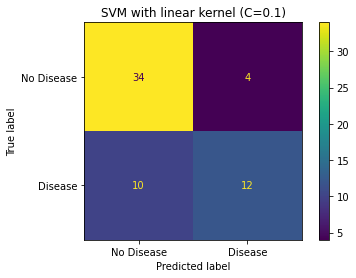



              precision    recall  f1-score   support

           0       0.77      0.89      0.83        38
           1       0.75      0.55      0.63        22

    accuracy                           0.77        60
   macro avg       0.76      0.72      0.73        60
weighted avg       0.76      0.77      0.76        60



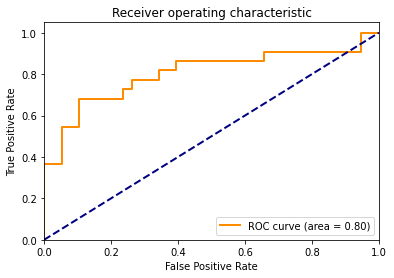

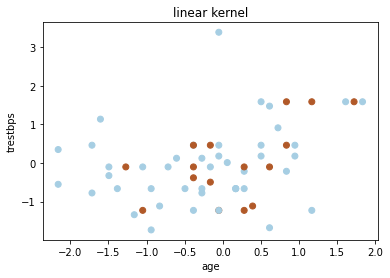

Feature  age  :  0.07091628438467341
Feature  trestbps  :  0.04367312606987221
Feature  chol  :  0.15426177838006438
Feature  thalach  :  -0.504243378155127
Feature  oldpeak  :  0.6751050273844399


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


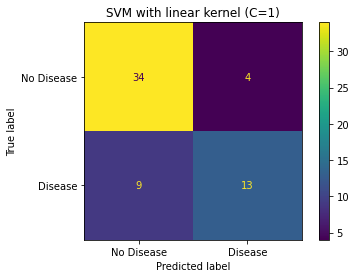



              precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.76      0.59      0.67        22

    accuracy                           0.78        60
   macro avg       0.78      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



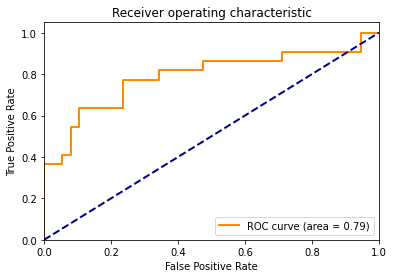

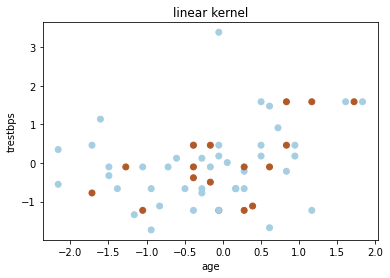

Feature  age  :  -0.003346964336157221
Feature  trestbps  :  0.023100263614948685
Feature  chol  :  0.18095459768561611
Feature  thalach  :  -0.5519482462843611
Feature  oldpeak  :  0.7814563677650239


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


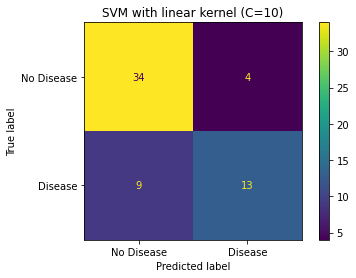



              precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.76      0.59      0.67        22

    accuracy                           0.78        60
   macro avg       0.78      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



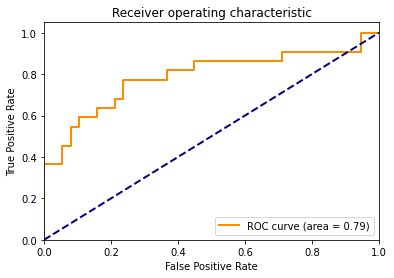

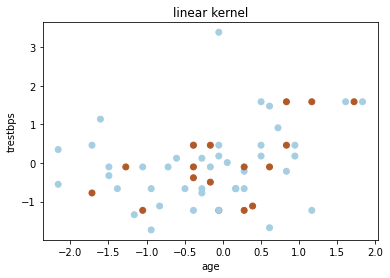

Feature  age  :  -0.0005097719631699249
Feature  trestbps  :  0.029445077191232016
Feature  chol  :  0.17708774674029026
Feature  thalach  :  -0.5468412829202745
Feature  oldpeak  :  0.802787206491284


In [47]:
Cs = [0.1, 1, 10]
for C in Cs:
    clflinear = svm.SVC(kernel='linear', C=C, probability=True)
    clflinear.fit(features_train, labels_train)
    plot_confusion_matrix(clflinear, features_test, labels_test, display_labels=['No Disease', 'Disease'])
    plt.title(f'SVM with linear kernel (C={C})')
    plt.show()
    print('\n')
    labels_predicted_linear = clflinear.predict(features_test) 
    labels_predicted_linear
    print(classification_report(labels_test, labels_predicted_linear))
    
    fpr, tpr, thresholds = roc_curve(labels_test, clflinear.predict_proba(features_test)[:,1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    y_pred = clflinear.predict(features_test)
    plt.figure()
    plt.scatter(features_test.iloc[:, 0], features_test.iloc[:, 1], c=y_pred, cmap=plt.cm.Paired)
    plt.xlabel('age')
    plt.ylabel('trestbps')
    plt.title(f'linear kernel')
    plt.show()
    
    importances = clflinear.coef_

    # Print feature importances
    for i in range(importances.shape[1]):
        print("Feature ", data_svm.columns[i], " : ", importances[0][i])

In [45]:
data_svm.columns[0]

'age'

<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


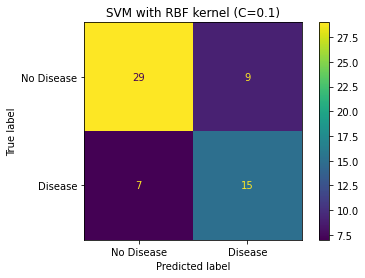



              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.62      0.68      0.65        22

    accuracy                           0.73        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.74      0.73      0.74        60



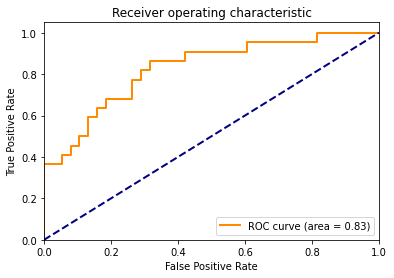

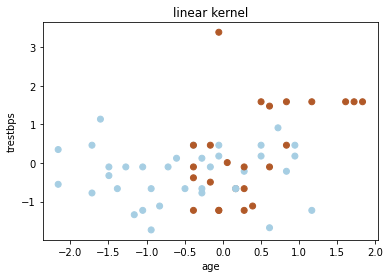

Feature  age  :  0.01380471380471381
Feature  trestbps  :  0.013131313131313138
Feature  chol  :  0.0040404040404040335
Feature  thalach  :  0.06464646464646465
Feature  oldpeak  :  0.07171717171717173


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


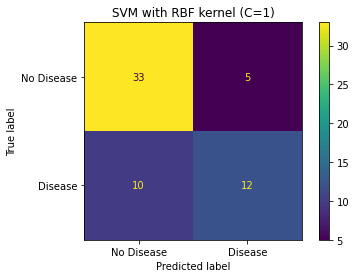



              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.71      0.55      0.62        22

    accuracy                           0.75        60
   macro avg       0.74      0.71      0.72        60
weighted avg       0.74      0.75      0.74        60



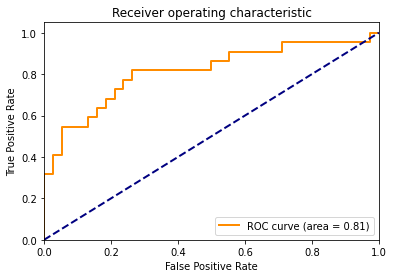

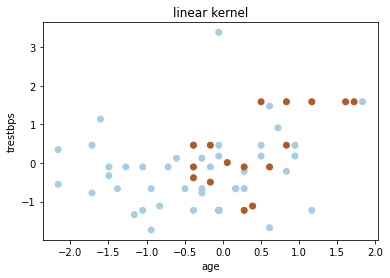

Feature  age  :  0.04377104377104378
Feature  trestbps  :  0.01616161616161619
Feature  chol  :  0.02390572390572391
Feature  thalach  :  0.07744107744107746
Feature  oldpeak  :  0.11885521885521885


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


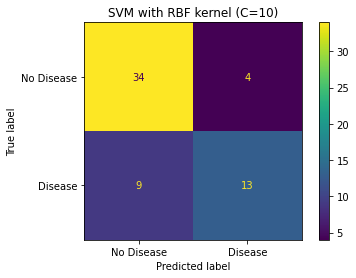



              precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.76      0.59      0.67        22

    accuracy                           0.78        60
   macro avg       0.78      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



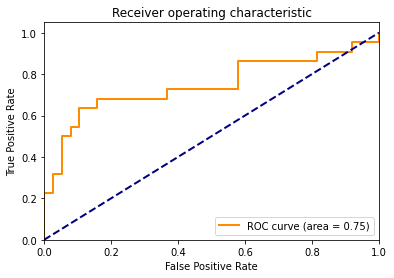

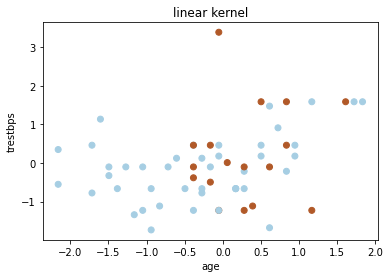

Feature  age  :  0.10370370370370367
Feature  trestbps  :  0.08114478114478114
Feature  chol  :  0.0734006734006734
Feature  thalach  :  0.10909090909090909
Feature  oldpeak  :  0.1383838383838384


In [48]:
Cs = [0.1, 1, 10]
for C in Cs:
    clfrbf = svm.SVC(kernel='rbf', C=C, probability=True)
    clfrbf.fit(features_train, labels_train)
    plot_confusion_matrix(clfrbf, features_test, labels_test, display_labels=['No Disease', 'Disease'])
    plt.title(f'SVM with RBF kernel (C={C})')
    plt.show()
    print('\n')
    labels_predicted_rbf = clfrbf.predict(features_test) 
    labels_predicted_rbf
    print(classification_report(labels_test, labels_predicted_rbf))
    
    fpr, tpr, thresholds = roc_curve(labels_test, clfrbf.predict_proba(features_test)[:,1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    y_pred = clfrbf.predict(features_test)
    plt.figure()
    plt.scatter(features_test.iloc[:, 0], features_test.iloc[:, 1], c=y_pred, cmap=plt.cm.Paired)
    plt.xlabel('age')
    plt.ylabel('trestbps')
    plt.title(f'linear kernel')
    plt.show()
    
    # Estimate feature importances using permutation feature importance
    from sklearn.inspection import permutation_importance
    result = permutation_importance(clfrbf, features, data_svm.target, n_repeats=10, random_state=0)
    importances = result.importances_mean

    # Print feature importances
    for i in range(importances.shape[0]):
        print("Feature ",data_svm.columns[i], " : ", importances[i])


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


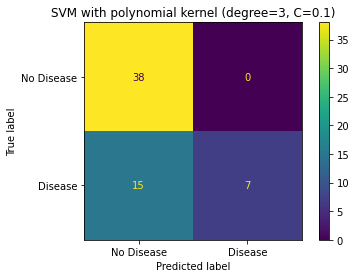



              precision    recall  f1-score   support

           0       0.72      1.00      0.84        38
           1       1.00      0.32      0.48        22

    accuracy                           0.75        60
   macro avg       0.86      0.66      0.66        60
weighted avg       0.82      0.75      0.71        60



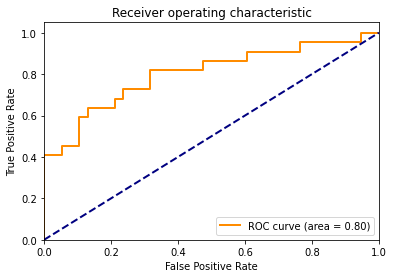

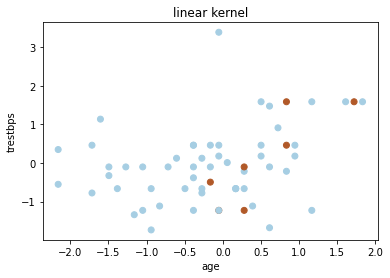

Feature  age  :  0.007407407407407451
Feature  trestbps  :  0.028619528619528677
Feature  chol  :  0.027946127946127997
Feature  thalach  :  0.09730639730639735
Feature  oldpeak  :  0.11111111111111116


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


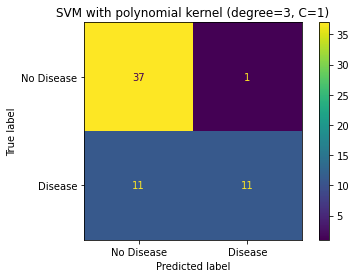



              precision    recall  f1-score   support

           0       0.77      0.97      0.86        38
           1       0.92      0.50      0.65        22

    accuracy                           0.80        60
   macro avg       0.84      0.74      0.75        60
weighted avg       0.82      0.80      0.78        60



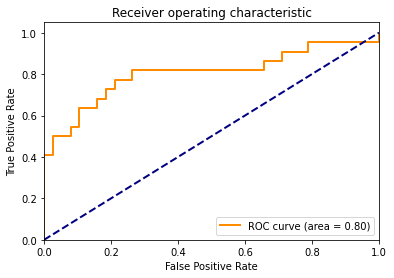

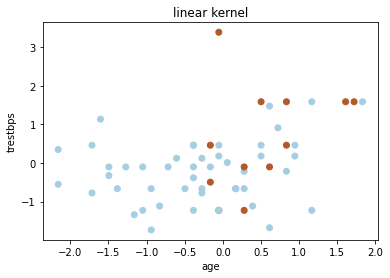

Feature  age  :  0.03131313131313128
Feature  trestbps  :  0.04276094276094272
Feature  chol  :  0.03299663299663297
Feature  thalach  :  0.09158249158249156
Feature  oldpeak  :  0.13905723905723896


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


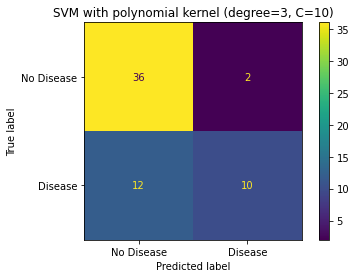



              precision    recall  f1-score   support

           0       0.75      0.95      0.84        38
           1       0.83      0.45      0.59        22

    accuracy                           0.77        60
   macro avg       0.79      0.70      0.71        60
weighted avg       0.78      0.77      0.75        60



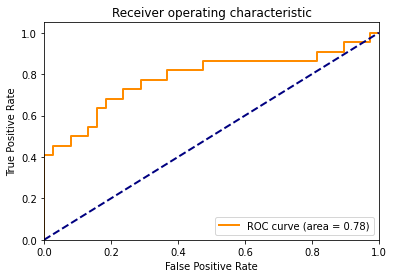

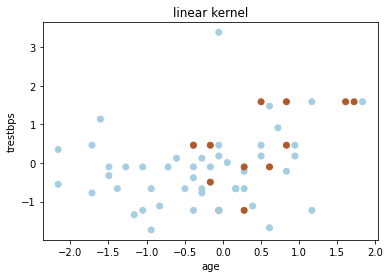

Feature  age  :  0.043097643097643114
Feature  trestbps  :  0.03973063973063973
Feature  chol  :  0.05521885521885522
Feature  thalach  :  0.08585858585858588
Feature  oldpeak  :  0.15218855218855218


In [49]:
Cs = [0.1, 1, 10]
for C in Cs:
    clfpoly = svm.SVC(kernel='poly', degree=3, C=C, probability=True)
    clfpoly.fit(features_train, labels_train)
    plot_confusion_matrix(clfpoly, features_test, labels_test, display_labels=['No Disease', 'Disease'])
    plt.title(f'SVM with polynomial kernel (degree=3, C={C})')
    plt.show()
    print('\n')
    labels_predicted_poly = clfpoly.predict(features_test) 
    labels_predicted_poly
    print(classification_report(labels_test, labels_predicted_poly))
    
    fpr, tpr, thresholds = roc_curve(labels_test, clfpoly.predict_proba(features_test)[:,1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    y_pred = clfpoly.predict(features_test)
    plt.figure()
    plt.scatter(features_test.iloc[:, 0], features_test.iloc[:, 1], c=y_pred, cmap=plt.cm.Paired)
    plt.xlabel('age')
    plt.ylabel('trestbps')
    plt.title(f'linear kernel')
    plt.show()
    
    # Estimate feature importances using permutation feature importance
    from sklearn.inspection import permutation_importance
    result = permutation_importance(clfpoly, features, data_svm.target, n_repeats=10, random_state=0)
    importances = result.importances_mean

    # Print feature importances
    for i in range(importances.shape[0]):
        print("Feature ",data_svm.columns[i], " : ", importances[i])

<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


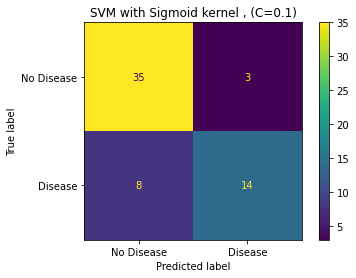



              precision    recall  f1-score   support

           0       0.81      0.92      0.86        38
           1       0.82      0.64      0.72        22

    accuracy                           0.82        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.82      0.82      0.81        60



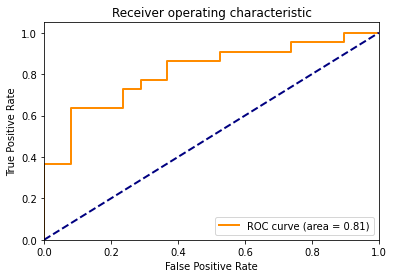

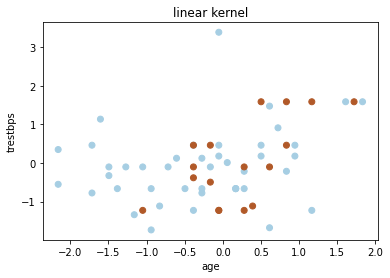

Feature  age  :  0.005723905723905775
Feature  trestbps  :  0.009427609427609474
Feature  chol  :  0.011784511784511842
Feature  thalach  :  0.09528619528619534
Feature  oldpeak  :  0.10808080808080814


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


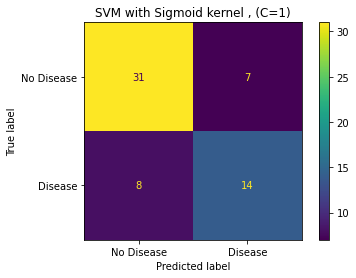



              precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.67      0.64      0.65        22

    accuracy                           0.75        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.75      0.75      0.75        60



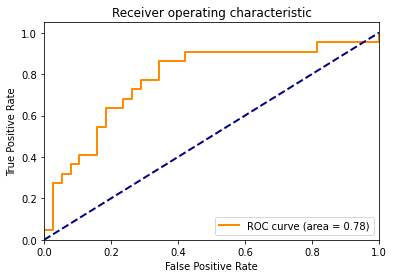

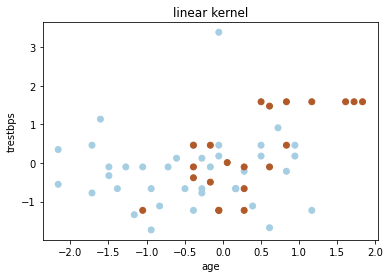

Feature  age  :  -0.0013468013468013074
Feature  trestbps  :  0.010437710437710478
Feature  chol  :  0.0006734006734006925
Feature  thalach  :  0.10101010101010104
Feature  oldpeak  :  0.04949494949494952


<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


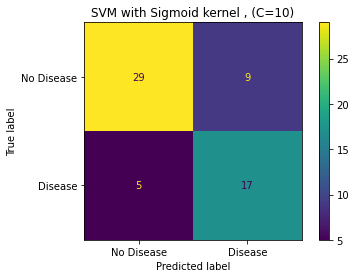



              precision    recall  f1-score   support

           0       0.85      0.76      0.81        38
           1       0.65      0.77      0.71        22

    accuracy                           0.77        60
   macro avg       0.75      0.77      0.76        60
weighted avg       0.78      0.77      0.77        60



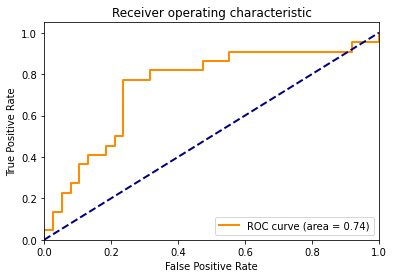

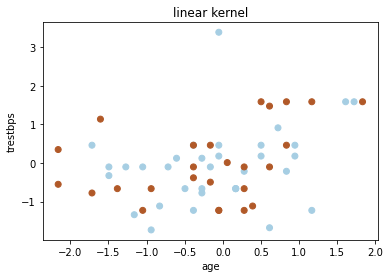

Feature  age  :  -0.03535353535353538
Feature  trestbps  :  -0.010437710437710478
Feature  chol  :  -0.02760942760942764
Feature  thalach  :  0.057239057239057235
Feature  oldpeak  :  0.04511784511784509


In [50]:
Cs = [0.1, 1, 10]
for C in Cs:
    clfsig = svm.SVC(kernel='sigmoid', C=C, probability=True)
    clfsig.fit(features_train, labels_train)
    plot_confusion_matrix(clfsig, features_test, labels_test, display_labels=['No Disease', 'Disease'])
    plt.title(f'SVM with Sigmoid kernel , (C={C})')
    plt.show()
    
    print('\n')
    labels_predicted_sig = clfsig.predict(features_test) 
    labels_predicted_sig
    print(classification_report(labels_test, labels_predicted_sig))
    
    fpr, tpr, thresholds = roc_curve(labels_test, clfsig.predict_proba(features_test)[:,1])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    y_pred = clfsig.predict(features_test)
    plt.figure()
    plt.scatter(features_test.iloc[:, 0], features_test.iloc[:, 1], c=y_pred, cmap=plt.cm.Paired)
    plt.xlabel('age')
    plt.ylabel('trestbps')
    plt.title(f'linear kernel')
    plt.show()
    
    # Estimate feature importances using permutation feature importance
    from sklearn.inspection import permutation_importance
    result = permutation_importance(clfsig, features, data_svm.target, n_repeats=10, random_state=0)
    importances = result.importances_mean

    # Print feature importances
    for i in range(importances.shape[0]):
        print("Feature ", data_svm.columns[i], " : ", importances[i])

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


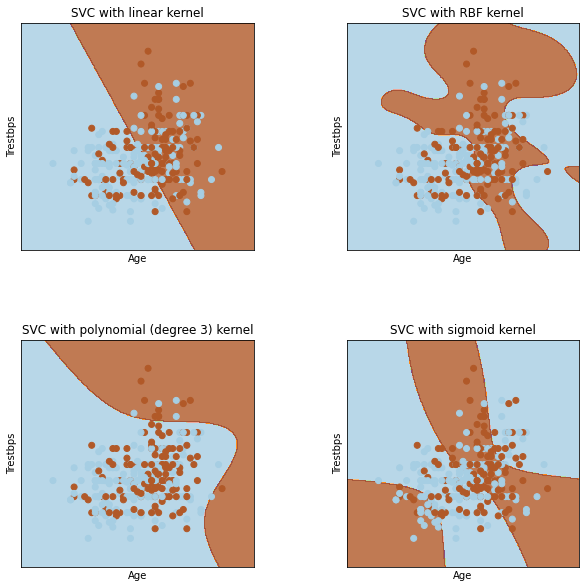

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

labels = data_svm['target']
X = pd.DataFrame( data_svm[['age', 'trestbps']])
y = data_svm.target

# fit the model
C = 5.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='sigmoid', degree=3, C=C))

models = (clf.fit(X, y) for clf in models)

# plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel')

fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    # plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # plot the scatter plot of data points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Age')
    ax.set_ylabel('Trestbps')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(features)

pcadata = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [38]:
pcadata

,principal component 1,principal component 2
0,-1.246778,-0.117832
1,-2.690244,0.432390
2,-1.490988,-1.254094
3,0.958527,-0.137156
4,1.440209,-0.434929
...,...,...
292,0.557653,-0.780441
293,-1.977248,-1.152805
294,-0.370057,-2.377625
295,0.891902,0.639557


In [39]:
X = pcadata.copy()
y = labels

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


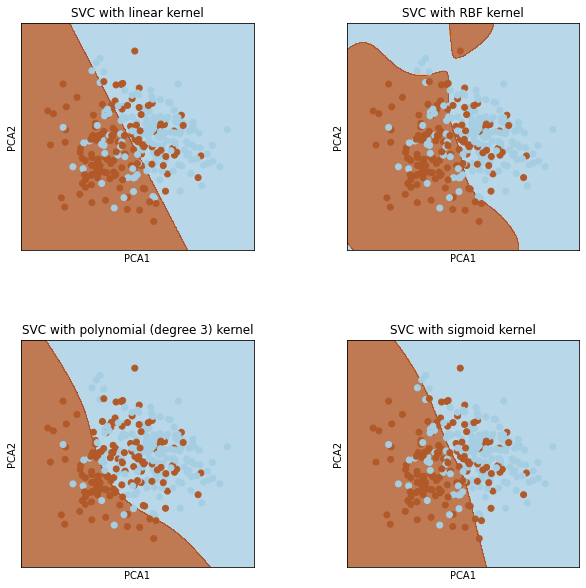

In [40]:
# fit the model
C = 0.1  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='sigmoid', degree=3, C=C))

models = (clf.fit(X, y) for clf in models)

# plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel')

fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    # plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # plot the scatter plot of data points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


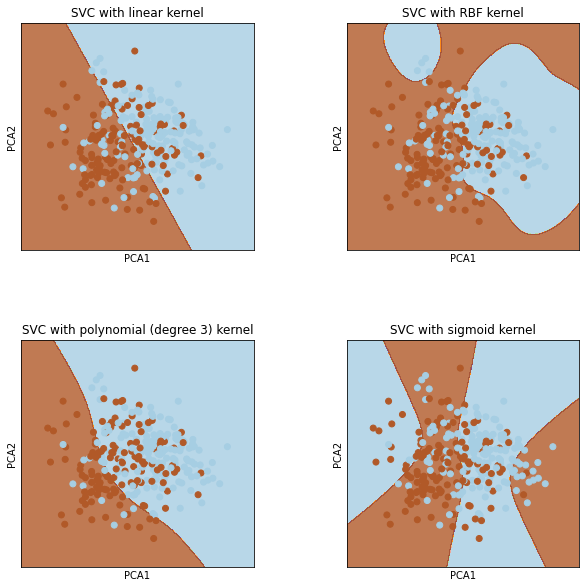

In [41]:
# fit the model
C = 1  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='sigmoid', degree=3, C=C))

models = (clf.fit(X, y) for clf in models)

# plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel')

fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    # plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # plot the scatter plot of data points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


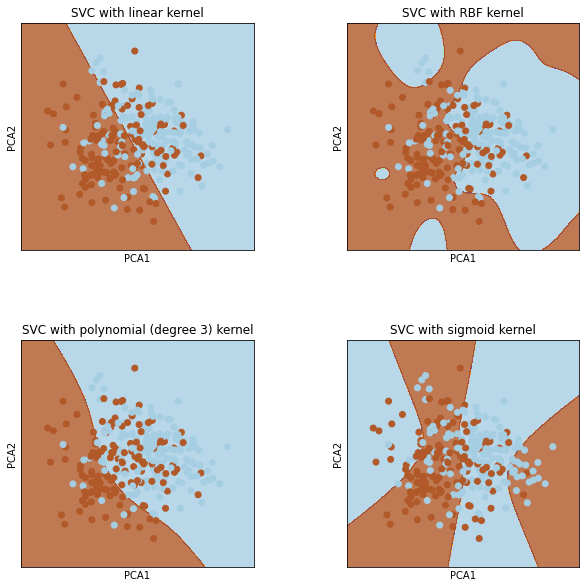

In [42]:
# fit the model
C = 10  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='sigmoid', degree=3, C=C))

models = (clf.fit(X, y) for clf in models)

# plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel')

fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    # plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # plot the scatter plot of data points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()